# Mezap

## Table of contents

- [Import Mezap class](#Import-Mezap-class)

- [Constructor](#Constructor)

- [Attributes](#Attributes)

- [Methods](#Methods)
    - [run](#run)

- [Examples](#Examples)
    - [example 1](#example-1)

## Import Mezap class

In [1]:
from pyLong.toolbox.mezap import Mezap

SQLalchemy is not installed. No support for SQL output.


## Constructor

In [2]:
mezap = Mezap()

## Attributes

| attribute        |  type      | setter | comment |
| :---             | :----:     | :----: | :----   |
| `name`           | `str`      | yes    |         |
| `results`        | `dict`     | no     |         |

## Methods

### run
```python
Mezap.run(self, zprofile, limits, reverse=False, x_start=0.)
```

In [3]:
help(Mezap.run)

Help on function run in module pyLong.toolbox.mezap:

run(self, zprofile, limits, reverse=False, x_start=0.0)
    run calculation
    
    arguments:
    - zprofile: profile - zProfile
    - limits: threshold values filename - str
    - reverse: reverse the profile - bool
    - x_start: start distance (m) - int | float
    
    returns:
    - True if succes - bool
    - False else - bool
    
    examples:
    >>> mezap.run(zprofile, limits, x_start=0.)



## Examples

### example 1

In [4]:
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

from pyLong.profiles.zprofile import zProfile
from pyLong.toolbox.mezap import Mezap

In [5]:
zprofile = zProfile()
zprofile.from_txt("profile.txt")

True

In [6]:
mezap = Mezap()
limits = "limits.txt"
mezap.run(zprofile,
          limits,
          reverse=False,
          x_start=2.)

True

In [7]:
mezap.results["distances"]

[0.0,
 10.274043307942742,
 34.592342138247474,
 53.916451690824545,
 60.912633578111354,
 83.4799336824659,
 100.12810730601993,
 111.66682720902477,
 134.2658924330556]

In [8]:
mezap.results["angles"]

[0.0,
 76.00871319453742,
 80.04981401766767,
 61.07810018961016,
 54.698607339804525,
 45.941720328029135,
 40.64337449117929,
 39.44671786556161,
 33.64425660386168]

In [9]:
mezap.results["normalized_areas"]

[0.0,
 0.12458324072015982,
 0.0985139698920297,
 0.1317540202344975,
 0.1363809812617971,
 0.23239830034147535,
 0.2809624801057471,
 0.3363178816287745,
 0.3655117124258974]

In [10]:
mezap.results["intersections"]

[('high', 57.057082482038176, 0.13467041071584807),
 ('medium', 51.342168144979325, 0.1731835907630621),
 ('low', 44.19372589251391, 0.24842026617898277)]

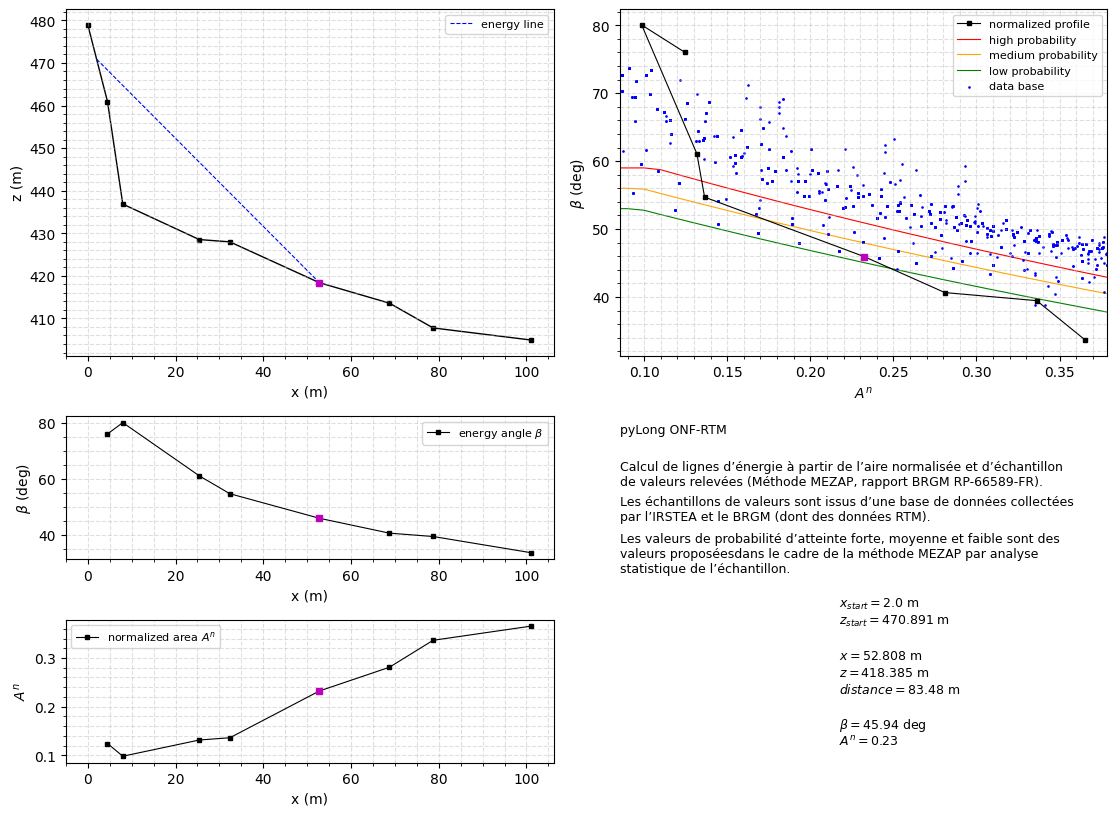

In [11]:
limits = np.loadtxt("limits.txt")
sample = np.loadtxt("sample.txt")

i = 5

if 0 < i < len(zprofile.x):

    fig = plt.figure(constrained_layout=True,
                     figsize=(1.*29.7/2.54, 1.*21/2.54))

    gs = GridSpec(4,
                  2,
                  figure=fig)

    ax_profile = fig.add_subplot(gs[0:2, 0])
    ax_mezap = fig.add_subplot(gs[0:2, 1])
    ax_angles = fig.add_subplot(gs[2, 0],
                                sharex=ax_profile)
    ax_areas = fig.add_subplot(gs[3, 0],
                               sharex=ax_profile)
    ax_summary = fig.add_subplot(gs[2:, 1])
    ax_summary.axis('off')

    ax_profile.set_xlim(min(zprofile.x) - 0.05 * (max(zprofile.x) - min(zprofile.x)),
                        max(zprofile.x) + 0.05 * (max(zprofile.x) - min(zprofile.x)))
    ax_profile.set_ylim(min(zprofile.z) - 0.05 * (max(zprofile.z) - min(zprofile.z)),
                        max(zprofile.z) + 0.05 * (max(zprofile.z) - min(zprofile.z)))
    ax_profile.set_xlabel("x (m)")
    ax_profile.set_ylabel("z (m)")
    ax_profile.grid(True,
                    linestyle="--",
                    alpha=0.4,
                    which="both")
    ax_profile.minorticks_on()

    distances = mezap.results["distances"]
    norm_areas = mezap.results["normalized_areas"]
    energy_angles = mezap.results["angles"]

    ax_mezap.set_xlim(min(norm_areas[1:]) - 0.05 * (max(norm_areas[1:]) - min(norm_areas[1:])),
                      max(norm_areas[1:]) + 0.05 * (max(norm_areas[1:]) - min(norm_areas[1:])))
    ax_mezap.set_ylim(min(energy_angles[1:]) - 0.05 * (max(energy_angles[1:]) - min(energy_angles[1:])),
                      max(energy_angles[1:]) + 0.05 * (max(energy_angles[1:])-min(energy_angles[1:])))
    ax_mezap.set_xlabel(r"$A^n$")
    ax_mezap.set_ylabel(r"$\beta$ (deg)")
    ax_mezap.grid(True,
                  linestyle="--",
                  alpha=0.4,
                  which="both")
    ax_mezap.minorticks_on()

    ax_angles.set_ylim(min(energy_angles[1:]) - 0.05 * (max(energy_angles[1:]) - min(energy_angles[1:])),
                       max(energy_angles[1:]) + 0.05 * (max(energy_angles[1:]) - min(energy_angles[1:])))
    ax_angles.set_xlabel("x (m)")
    ax_angles.set_ylabel(r"$\beta$ (deg)")
    ax_angles.grid(True,
                   linestyle="--",
                   alpha=0.4,
                   which="both")
    ax_angles.minorticks_on()

    ax_areas.set_ylim(min(norm_areas[1:]) - 0.05 * (max(norm_areas[1:]) - min(norm_areas[1:])),
                      max(norm_areas[1:]) + 0.05 * (max(norm_areas[1:]) - min(norm_areas[1:])))
    ax_areas.set_xlabel("x (m)")
    ax_areas.set_ylabel(r"$A^n$")
    ax_areas.grid(True,
                  linestyle="--",
                  alpha=0.4,
                  which="both")
    ax_areas.minorticks_on()

    #####----- PROFILE -----#####
    x_start = mezap.results["x_start"]
    z_start = mezap.results["z_start"]
    ax_profile.plot([x_start, zprofile.x[i]],
                    [z_start, zprofile.z[i]],
                    color="Blue",
                    lw=0.8,
                    linestyle="--",
                    label="energy line")

    zprofile.marker_style = "square"
    zprofile.marker_size = 3
    zprofile.plot(ax_profile)

    ax_profile.legend(loc="best",
                      fontsize=8)

    ax_profile.plot([zprofile.x[i]],
                    [zprofile.z[i]],
                    'ms',
                    markersize=4)

    #####----- MEZAP -----#####
    ax_mezap.plot(norm_areas[1:],
                  energy_angles[1:],
                  color="Black",
                  lw=0.8,
                  marker="s",
                  markersize=3,
                  zorder=2,
                  label="normalized profile")

    ax_mezap.plot(limits[:,0],
                  limits[:,3],
                  color='Red',
                  lw=0.8,
                  label="high probability",
                  zorder=1)
    ax_mezap.plot(limits[:,0],
                  limits[:,2],
                  color='Orange',
                  lw=0.8,
                  label="medium probability",
                  zorder=1)
    ax_mezap.plot(limits[:,0],
                  limits[:,1],
                  color='Green',
                  lw=0.8,
                  label="low probability",
                  zorder=1)

    ax_mezap.scatter(sample[:, 0],
                     sample[:, 1],
                     s=0.8,
                     color="Blue",
                     label="data base")

    ax_mezap.plot([norm_areas[i]],
                  [energy_angles[i]],
                  'ms',
                  markersize=4,
                  zorder=3)

    ax_mezap.legend(loc="best",
                    fontsize=8)

    #####----- ANGLES -----#####
    ax_angles.plot(zprofile.x[1:],
                   energy_angles[1:],
                   color="Black",
                   lw=0.8,
                   marker="s",
                   markersize=3,
                   label=r"energy angle $\beta$")

    ax_angles.plot([zprofile.x[i]],
                   [energy_angles[i]],
                   'ms',
                   markersize=4)

    ax_angles.legend(loc="best",
                     fontsize=8)

    #####----- AREAS -----#####
    ax_areas.plot(zprofile.x[1:],
                  norm_areas[1:],
                  color="Black",
                  lw=0.8,
                  marker="s",
                  markersize=3,
                  label=r"normalized area $A^{n}$")

    ax_areas.plot(zprofile.x[i],
                  norm_areas[i],
                  'ms',
                  markersize=4)

    ax_areas.legend(loc="best",
                    fontsize=8)

    #####----- SUMMARY -----#####
    ax_summary.text(0,
                    0.95,
                    "pyLong ONF-RTM",
                    fontsize=9)
    ax_summary.text(0,
                    0.80,
                    "Calcul de lignes d’énergie à partir de l’aire normalisée et d’échantillon\nde valeurs relevées (Méthode MEZAP, rapport BRGM RP-66589-FR).",
                    fontsize=9)
    ax_summary.text(0,
                    0.70,
                    "Les échantillons de valeurs sont issus d’une base de données collectées\npar l’IRSTEA et le BRGM (dont des données RTM).",
                    fontsize=9)
    ax_summary.text(0,
                    0.55,
                    "Les valeurs de probabilité d’atteinte forte, moyenne et faible sont des\nvaleurs proposéesdans le cadre de la méthode MEZAP par analyse\nstatistique de l’échantillon.",
                    fontsize=9)

    ax_summary.text(0.45,
                    0.45,
                    r"$x_{start} =$" + rf"${round(x_start, 3)}$ m",
                    fontsize=9)
    ax_summary.text(0.45,
                    0.40,
                    r"$z_{start} =$" + rf"${round(z_start, 3)}$ m",
                    fontsize=9)

    ax_summary.text(0.45,
                    0.30,
                    rf"$x = {round(zprofile.x[i], 3)}$ m",
                    fontsize=9)
    ax_summary.text(0.45,
                    0.25,
                    rf"$z = {round(zprofile.z[i], 3)}$ m",
                    fontsize=9)
    ax_summary.text(0.45,
                    0.20,
                    r"$distance =$" + rf"${round(distances[i], 3)}$ m",
                    fontsize=9)

    ax_summary.text(0.45,
                    0.10,
                    rf"$\beta = {round(energy_angles[i], 2)}$ deg",
                    fontsize=9)
    ax_summary.text(0.45,
                    0.05,
                    rf"$A^n = {round(norm_areas[i], 2)}$",
                    fontsize=9)

    plt.tight_layout()
    plt.show()